# Example 2: Running PPI with Retrospective Goals

## Import the necessary libraries

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import ppi

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


## Load data

In [2]:
data = pd.read_csv('final_sample_normalized.csv', sep='\t', header=0, low_memory=False, encoding='utf-16') # indicators
alphas = np.loadtxt('alphas.csv') # growth factors
A = np.loadtxt('network.csv') # network
phi, tau = np.loadtxt('governance_params.csv') # governance parameters

## Prepare data for PPI

In [3]:
series = data[[str(year) for year in range(2006, 2017)]].values # extract the time series from the data
I0, T = ppi.get_targets(series) # use the helper function get_targets() to transform the final values into targets
R = data['instrumental'].values # extract the variable indicating which indicators are instrumental
r = np.where(R==1)[0] # get the index of the instrumental indicators
colors = dict(zip(data.index, data.goalColor)) # build a dictionary mapping each indicator to its SDG color

## Run PPI one time

In [4]:
outputs = ppi.run_ppi(I0, T, A=A, alpha=alphas, R=R, phi=phi, tau=tau) # run PPI one time
tsI, tsC, tsF, tsP, tsD, tsS, times, H = outputs # store the outpurs in separate objects

## Plot dynamics

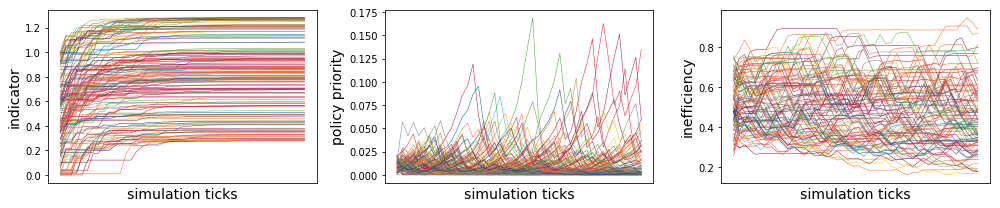

In [5]:
fig = plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
for i in range(len(data)):
    plt.plot(tsI[i], color=colors[i], linewidth=.5)
plt.xticks([])
plt.xlabel('simulation ticks', fontsize=14)
plt.ylabel('indicator', fontsize=14)

plt.subplot(1,3,2)
for i in range(sum(R)):
    plt.plot(tsP[i], color=colors[r[i]], linewidth=.5)
plt.xticks([])
plt.xlabel('simulation ticks', fontsize=14)
plt.ylabel('policy priority', fontsize=14)

plt.subplot(1,3,3)
for i in range(sum(R)):
    plt.plot(tsD[i]/tsP[i], color=colors[r[i]], linewidth=.5)
plt.xticks([])
plt.xlabel('simulation ticks', fontsize=14)
plt.ylabel('inefficiency', fontsize=14)

plt.tight_layout()
plt.show()

## Plot relationship between priorites and data (evaluate outputs' triviality)

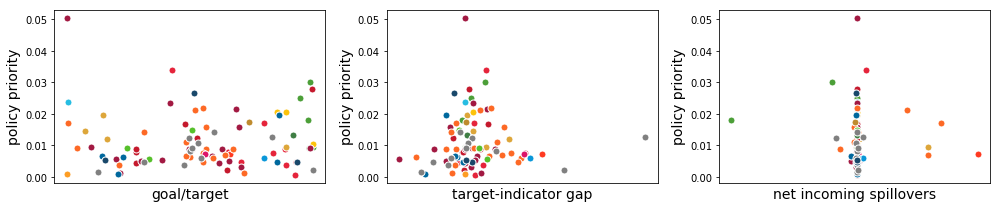

In [6]:
fig = plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
for i in range(sum(R)):
    plt.plot(T[R==1][i], tsP[i].mean(), '.', mfc=colors[r[i]], mec='white', markersize=14)
plt.xticks([])
plt.xlabel('goal/target', fontsize=14)
plt.ylabel('policy priority', fontsize=14)

plt.subplot(1,3,2)
for i in range(sum(R)):
    plt.plot(T[R==1][i]-I0[R==1][i], tsP[i].mean(), '.', mfc=colors[r[i]], mec='white', markersize=14)
plt.xticks([])
plt.xlabel('target-indicator gap', fontsize=14)
plt.ylabel('policy priority', fontsize=14)

plt.subplot(1,3,3)
for i in range(sum(R)):
    plt.plot(A.sum(axis=0)[R==1][i], tsP[i].mean(), '.', mfc=colors[r[i]], mec='white', markersize=14)
plt.xticks([])
plt.xlabel('net incoming spillovers', fontsize=14)
plt.ylabel('policy priority', fontsize=14)

plt.tight_layout()
plt.show()

## Make bar charts at the level of indicators and SDGs

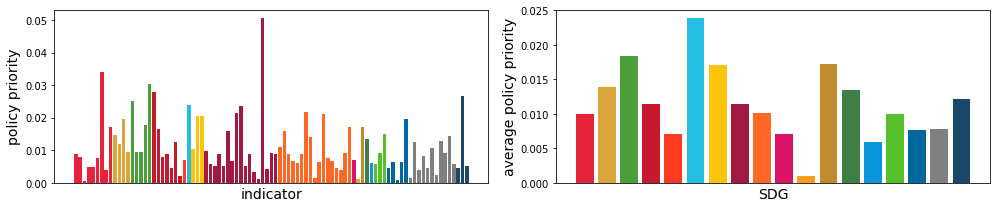

In [7]:
fig = plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
for i in range(sum(R)):
    plt.bar(i, tsP[i].mean(), color=colors[r[i]])
plt.xticks([])
plt.xlabel('indicator', fontsize=14)
plt.ylabel('policy priority', fontsize=14)

plt.subplot(1,2,2)
sdgs = data.goal.values
sdg = '1'
sdg_ps = [[]]
sdg_color = [colors[0]]
for i in range(sum(R)):
    if sdgs[r[i]] == sdg:
        sdg_ps[-1].append(tsP[i].mean())
    else:
        sdg_ps.append([tsP[i].mean()])
        sdg = sdgs[r[i]]
        sdg_color.append(colors[r[i]])
for i, bar in enumerate(sdg_ps):
    plt.bar(i, np.mean(bar), color=sdg_color[i])
plt.xticks([])
plt.xlabel('SDG', fontsize=14)
plt.ylabel('average policy priority', fontsize=14)

plt.tight_layout()
plt.show()